## Exploration of fetch ephemeris content time handling

In [1]:
# Set package include path for git repo dir above
import sys

sys.path.insert(0, "..")

import matplotlib.pyplot as plt
import matplotlib.style
import numpy as np
import tables
from cxotime import CxoTime
from ska_matplotlib import plot_cxctime

from cheta import fetch

matplotlib.style.use("bmh")
%matplotlib inline

In [2]:
content = "ORBITEPHEM0"
start = CxoTime("2025:245")
stop = CxoTime("2025:260")

### First just get the raw times in `TIME.h5`

In [3]:
h5_slice = fetch.get_interval(content, start.secs, stop.secs)
h5_slice

slice(42828254, 42910050, None)

In [4]:
fetch.content.get("orbitephem0_x".upper())

'orbitephem0'

In [5]:
fetch.ft["msid"] = "time"
filename = fetch.msid_files["msid"].abs
filename

'/Users/aldcroft/ska/data/eng_archive/data/ORBITEPHEM0/TIME.h5'

In [6]:
with tables.open_file(filename) as h5:
    times = h5.root.data[h5_slice]
times.shape

(81796,)

In [7]:
# Use the new function in this PR to get the mask that selects the right points
ok = fetch._get_ephem_times_ok(times)

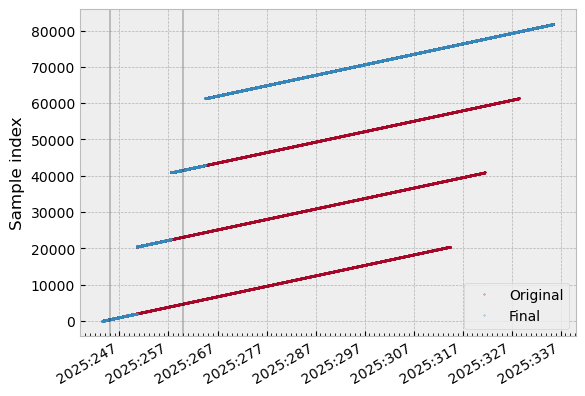

In [8]:
# Plot selected points in blue, original points in red. The y-axis is sample index.
idx = np.arange(len(times))
plot_cxctime(times, idx, ".", color="C1", ms=0.5, label="Original")
plot_cxctime(times[ok], idx[ok], ".", color="C0", ms=0.5, label="Final")
plt.axvline(start.plot_date, lw=0.3, color="k")
plt.axvline(stop.plot_date, lw=0.3, color="k")
plt.legend()
plt.ylabel("Sample index");

In [9]:
# Confirm that the backward jumps are there in the original and gone in the final
print("Original", np.unique(np.diff(times)))
print("Final", np.unique(np.diff(times[ok])))

Original [-5.5296e+06  3.0000e+02]
Final [300.]


In [10]:
# Coverage of each file
5.5296e06 / 86400 + 7

71.0

### Now confirm that fetch.MSID is doing the right thing

In [11]:
dat = fetch.MSID("orbitephem0_x", start, stop)

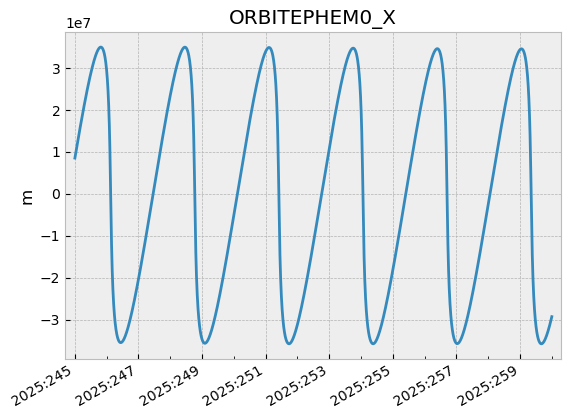

In [12]:
dat.plot()

In [13]:
np.unique(np.diff(dat.times))

array([300.])

### Use an MSID that is in the oddball ANGLEEPHEM content type

In [14]:
point_x = fetch.Msid("point_x", start, stop)

In [15]:
point_x.content

'angleephem'

In [16]:
np.unique(np.diff(point_x.times))

array([300.])

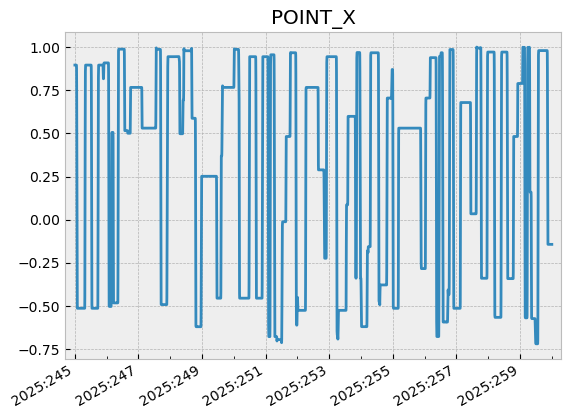

In [17]:
point_x.plot()

### Fetch ephemeris for the entire mission
Check performance (OK) and ordering (OK).

In [18]:
dat = fetch.Msid("orbitephem0_x", "1999:200")

In [19]:
set(np.diff(dat.times))

{299.9999999701977,
 300.0,
 300.00000001490116,
 300.0000000298023,
 301.0,
 43436.0}